# Samuel Vasco González

## TAREA 1. ENTRENAMIENTO REGRESIÓN LINEAL

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.integrate import quad
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
%matplotlib inline

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tarea1_Statical_Learning/building1retail.csv',index_col=[0], parse_dates=True)

data2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea1_Statical_Learning/building2retail.csv",index_col=[0], parse_dates=True)
#data2=data2.drop(["Timestamp"],axis=1)

data3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea1_Statical_Learning/building3retail.csv",index_col=[0], parse_dates=True)
#data3=data3.drop(["Timestamp"],axis=1)

data4=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea1_Statical_Learning/building4retail.csv",index_col=[0], parse_dates=True)
#data4=data4.drop(["Timestamp"],axis=1)

data5=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea1_Statical_Learning/building5retail.csv",index_col=[0], parse_dates=True)
#data5=data5.drop(["Timestamp"],axis=1)

#data_unifi=pd.concat([data1,data2,data3,data4,data5],axis=1)

a=[data1,data2,data3,data4,data5]

for i in range(5):
  a[i]=a[i].rename(columns={'OAT (F)':'OAT'+str(i+1)+' (F)', 'Power (kW)':'Power'+str(i+1)+' (kW)'})
  
data=pd.concat(a,axis=1)
data

OAT1 (F)  Power1 (kW)  ...  OAT5 (F)  Power5 (kW)
Timestamp                                   ...                       
2010-01-01 01:15:00        51        165.1  ...        67        162.6
2010-01-01 01:30:00        51        151.6  ...        67        156.5
2010-01-01 01:45:00        51        146.9  ...        67        157.2
2010-01-01 02:00:00        51        153.7  ...        67        151.0
2010-01-01 02:15:00        51        153.8  ...        63        160.5
...                       ...          ...  ...       ...          ...
2010-12-30 23:00:00        47        285.8  ...        67        333.7
2010-12-30 23:15:00        44        206.6  ...        68        221.0
2010-12-30 23:30:00        44        205.9  ...        68        235.7
2010-12-30 23:45:00        44        189.4  ...        68        227.2
2010-12-31 00:00:00        44        177.9  ...        68        234.5

[34940 rows x 10 columns]

Tenemos un DataFrame con 10 predictores para crar nuestro modelo de regresión lineal que busca modelar la relación entre el consumo de energía de un edificio en general y la temperatura ambiente externa.

# Exploración de datos

El DataFrame fue organizado con *5 edificios de retail*, donde cada columna corresponde a la temperatura ambiente externa $[F]$ y al consumo de energía $[kW]$ del respectivo edificio, y cada fila corresponde a la fecha *(año, mes, día, hora, minuto, segundo)* en que fue tomado el dato de temperatura y consumo.

Vamos a explorar los datos usando métodos de visualización para tener un panorama del comportamiento de nuestros datos.

In [60]:
data.index[0].minute

15

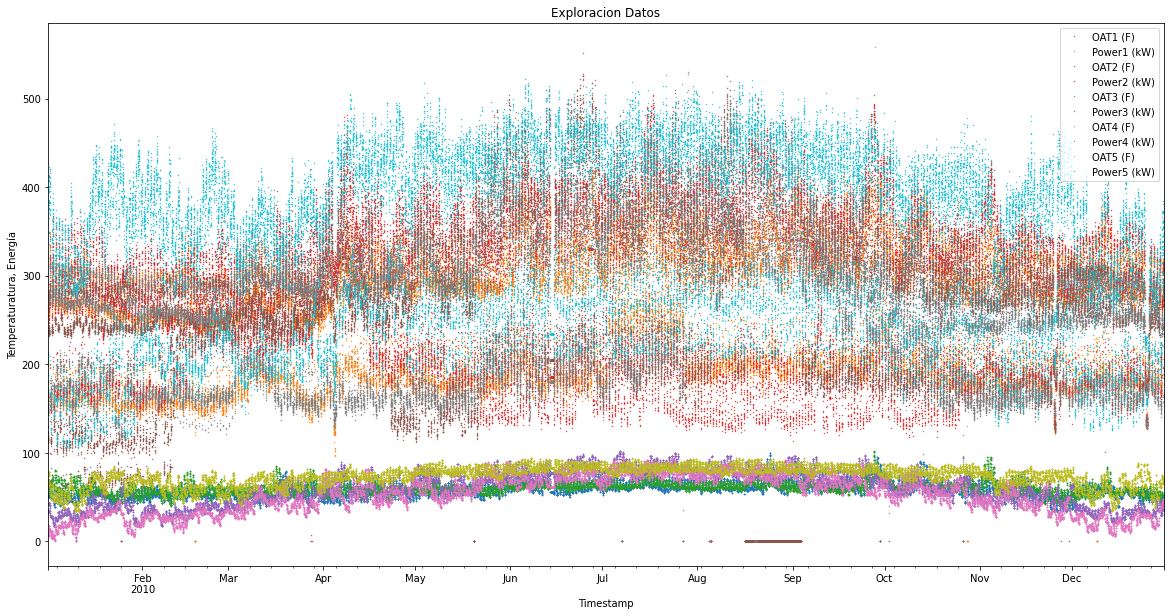

In [61]:
data.plot(figsize=(20,10),marker="o",ls="None",markersize=0.4,ylabel="Temperaturatura, Energía",title="Exploracion Datos")

En la gráfica se muestra una representación visual de los datos, donde las curvas gruesas que están en la parte superior corresponden al consumo de energía y las curvas delgadas que están en la parte inferior. El grosor de la gráfica se puede interpretar como la despersión de los datos, es decir, a mayor grosor de la gráfica mayor es la dispersión o variabilidad de los datos alrededor de un valor promedio; esto pasa en el consumo de energía de todos los edificios. Minetras que un grosor delgado se puede interpretar como una dispersión menor de los datos, es decir, los datos oscilan muy cerca a un valor promedio de todos los datos; esto pasa en la temperatura externa de cada edificio.  

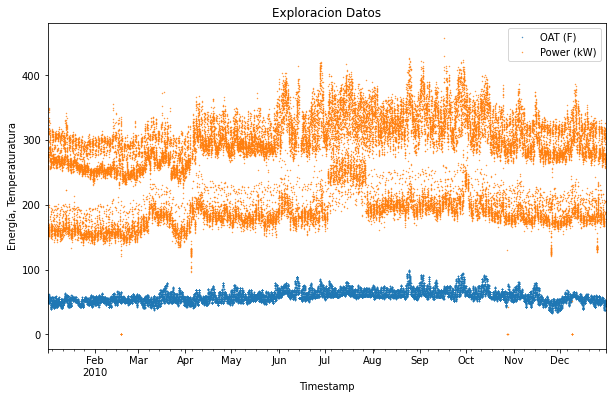

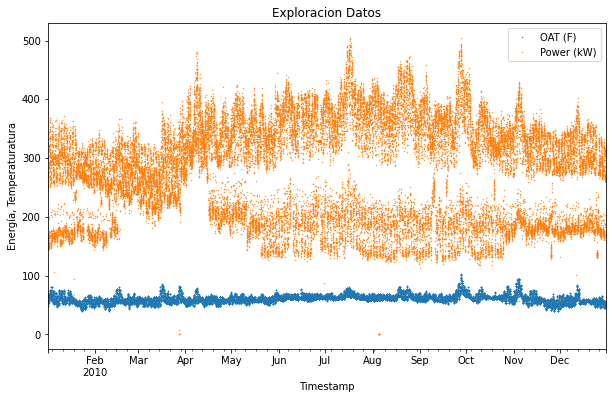

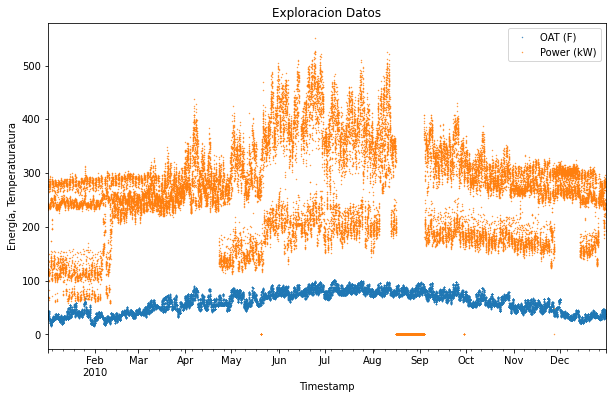

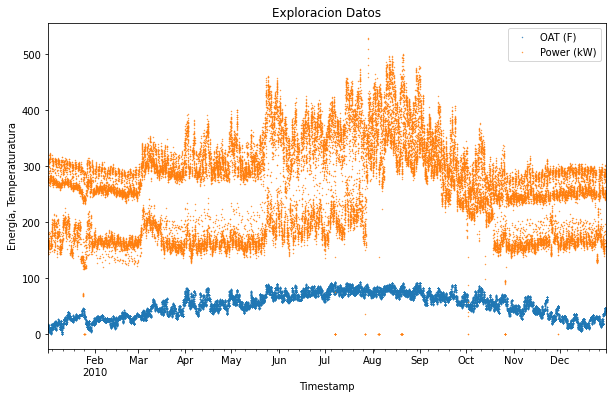

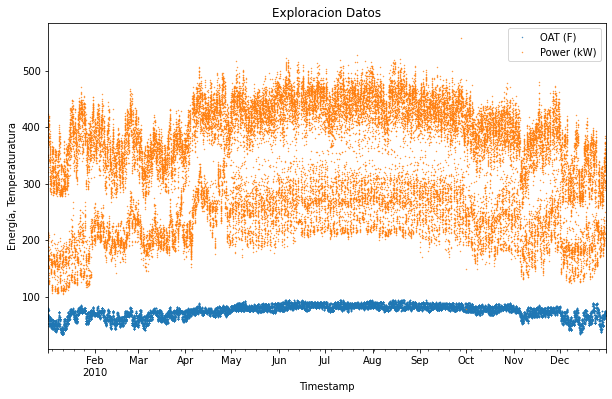

In [62]:
data1.plot(figsize=(10,6),marker="o",ls="None",markersize=0.4,ylabel="Energía, Temperaturatura",title="Exploracion Datos")
data2.plot(figsize=(10,6),marker="o",ls="None",markersize=0.4,ylabel="Energía, Temperaturatura",title="Exploracion Datos")
data3.plot(figsize=(10,6),marker="o",ls="None",markersize=0.4,ylabel="Energía, Temperaturatura",title="Exploracion Datos")
data4.plot(figsize=(10,6),marker="o",ls="None",markersize=0.4,ylabel="Energía, Temperaturatura",title="Exploracion Datos")
data5.plot(figsize=(10,6),marker="o",ls="None",markersize=0.4,ylabel="Energía, Temperaturatura",title="Exploracion Datos")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff472a49a90>,
      dtype=object)

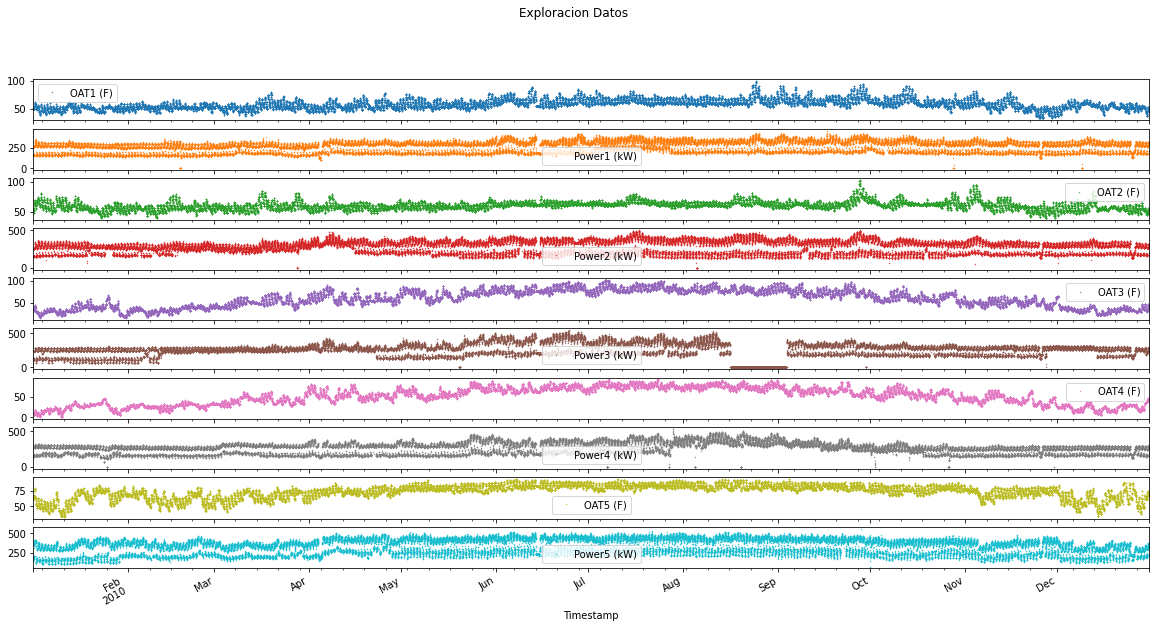

In [63]:
data.plot(figsize=(20,10),marker="o",ls="None",markersize=0.4,title="Exploracion Datos",subplots=True)

Podemos notar en los gráficos de energía que aparecen dos niveles, y levemente se identifica un tercero en el nivel superior. Esto puede indicar el consumo de energía en la mañana tarde y noche.

Revisión de valores faltantes. Primero usamos $isnull()$ (de pandas), lo cual nos crea un DtaFrame con entradas False o True, donde False significa entrada NO vacía y True significa entrada vacía. Segundo usamos $.values$ (de pandas), lo que nos convierte el DataFrame en una matriz de numpy, la cual en este caso estará llena con valores booleanos (True o False). Tercero usamos $.any()$ (de numpy), lo que arroja un booleano; si un arreglo de valores booleanos tiene almenos un True, entonces .any() arroja como resultado True, en caso contrario arroja False. La interpretacion en nuestro caso es que si $DataFrame.isnull().values.any()$ arroja False, entonces no hay valores faltantes en nuestro DataFrame y si arroja True hay valores faltantes.

In [64]:
data.isnull().values.any()

False

Por lo tanto no hay valores faltantes en nuestro DataFrame.

Veamos ahora el comportamiento de los datos graficando los histogramas de cada columna.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff472e56e90>,
      dtype=object)

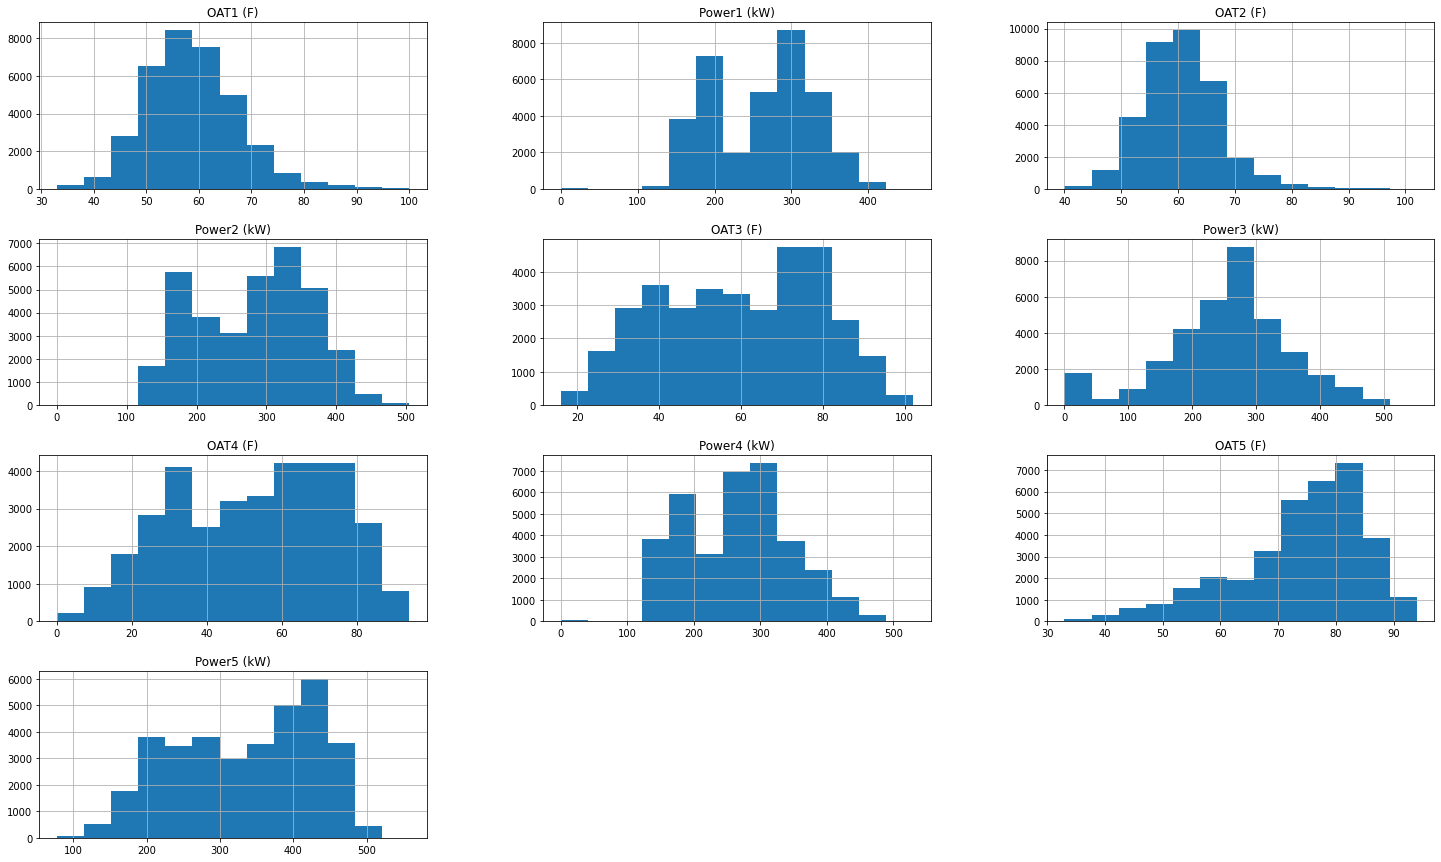

In [65]:
#data.plot(kind="hist",figsize=(20,10),ylabel="Temperaturatura, Energía",title="Exploracion Datos")
data.hist(figsize=(25,15),bins=13)

De estas gráficas podemos dar una conclusión cualitativa. Los datos asociados a la temperatura externa de los edificios 1, 2 y 5 parecen seguir una distribución normal, mientras que para los edificios 4 y 3 tienen una tendencia de distribución uniforme. Para el consumo de energía tenemos lo contrario, los edificios 3 y 4 parecen tener tendencia a distribución normal, mientras que para los edificios 1, 2 y 5 tenemos tendencia de distribución uniforme.

Para formalizar esta afirmación podemos usar un test de bondad Chi cuadrado $\chi^2$ para una incerteza $\alpha=5$% y comprobar si ajustando los datos a una distribución normal o uniforme según sea el caso, se rechaza o no el ajuste y nos permita concluir si tienen tendencia normal o uniforme de forma cuantitativa. 

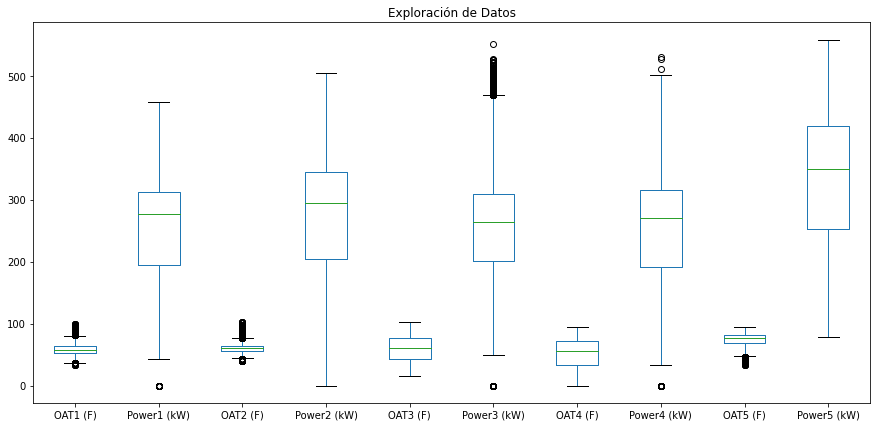

In [66]:
data.plot(kind="box",figsize=(15,7), title="Exploración de Datos")

El diagrama de cajas nos permite detectar outlier o datos atípicos en la temperatura externa de los edificios 1, 2, y 5; y en el consumo de energía para los edificios 1, 3 y 4.

Podemos afirmar la interpretación hecha sobre el grosor de las curvas con base a la figura [1], debido a que el diagrama de cajas para la temperatura externa de cualquiera de los edificios es compacta puesto que los bigotes son muy cortos en comparación con el resto, indicando que los datos están poco dispersos; diagrama de cajas para el consumo de energía de cualquiera de los edificios posee bigotes muy largos, permitiendo afirmar que los datos están muy dispersos.  

# Limpieza de Datos

Primero se eliminarán los valores atípicos.

De acuerdo al gráfico [subplots] La energía consumida del edificio 3 tiene valores en cero, lo cual es un valor atípico u outlier ya que el consumo de energía de un edificio nunca será cero, ni siquiera cuando la temperatura externa sea lo más templada posible. Sin embargo, aunque no son tan críticos como un valor cero, los otros edificios también presentan datos atípicos o outliers que fueron detectados gracias a la exploración de los datos, en específico el diagrama de cajas. 

En este segmento nos encargaremos de aplicar el Criterio de Chauvenet para limpiar esos datos atípicos.

## **Criterio de Chauvenet**

Si tenemos $N$ medidas $x_1,x_2,...,x_N$ de una cantidad $x$, y si una de las medidas $x_{sus}$ es sospechosamente diferente al resto, El Criterio de Chauvenet da un test simple para decidir si el valor sospechoso se acepta o se rechaza. 

Primero se calcula el promedio y la desviación estándar de las $N$ medidas y luego se encuentra el número de desviaciones estándar que difiere $x_{sus}$ de la media $\bar{x}$, esto lo vimos en clase como el *puntaje z*.

$$z=\dfrac{|x_{sus}-\bar{x}|}{\sigma_x}$$

Luego, hallamos la probabilidad de obtener $x_{sus}$ por fuera de $z$ veces la desviación estándar (en los libros se denota $P_{out}[z\sigma_x]$ a esta probabilidad). 

$$P_{out}[z\sigma_x]=1-P_{inside}[z\sigma_x]$$

Se asume que las medidas están distribuídas normalmente con los parámetros $\bar{x}$ y $\sigma_x$. La probabilidad de obtener $x_{sus}$ dentro de $z$ veces la desviación estándar se halla como el área bajo la curva de una distribución Gaussiana.

$$P_{inside}[z\sigma_x]=\frac{1}{\sqrt{2\pi}\sigma_x}\int_{-z}^{z}e^{-(x-\bar{x})^{2}/2\sigma_x^2}dx$$ 

Por último, según el Criterio de Chauvenet la medida $x_{sus}$ puede rechazarce si,

$$n=N\cdot(1-P_{inside}[z\sigma_x])<0.5$$


In [67]:
#Ejemplo de que el criterio funciona, el dato sospechoso es 58. Veremos que según 
#el criterio de Chauvenet podemos limpiar o rechazar este dato del dataset.

N=[46,48,44,38,45,47,58,44,45,43]
med=np.mean(N)
dev=np.std(N,ddof=1)
tam=len(N)
def z(x,med,dev):
  return abs(x-med)/dev

def f(x):
  return 1/(np.sqrt(2*np.pi))*np.e**(-(x)**2/(2))

def Prob(x,med,dev):
  return quad(f,-z(x,med,dev),z(x,med,dev))[0]  #integramos por cuadraturas 

def n(x,med,dev,tam):
  return tam*(1-Prob(x,med,dev))

for j in range(len(N)):
  n_Chau=n(N[j],med,dev,tam)
  if n_Chau<0.5:
    print(N[j],n_Chau,"<0.5 entonces se puede limpiar")

58 0.16173267866222085 <0.5 entonces se puede limpiar


Ahora aplicaremos este Criterio a la matriz del DataFrame construido al inicio.

In [68]:
#Convertimos el DataFrame en una matriz 
M=data.values

def z(x,med,dev):
  return abs(x-med)/dev

def f(x):
  return 1/(np.sqrt(2*np.pi))*np.e**(-(x)**2/(2))

def Prob(x,med,dev):
  return quad(f,-z(x,med,dev),z(x,med,dev))[0]  #integramos por cuadraturas 

def n(x,med,dev,tam):
  return tam*(1-Prob(x,med,dev))

Ml_Chau=np.zeros((len(M[:,0]),len(M[0]))) 

for i in range(len(M[0])):
  N=M[:,i]
  med=np.mean(N)
  dev=np.std(N,ddof=1)
  tam=len(N)
  for j in range(len(M[:,0])):
    n_Chau=n(M[:,i][j],med,dev,tam)
    Ml_Chau[j][i]=n_Chau

Ml_Chau


array([[13465.82580447,  4945.47987701, 11363.38032131, ...,
         4687.68196483, 19021.05598791,  2455.01493537],
       [13465.82580447,  3277.70854115, 11363.38032131, ...,
         4676.17920552, 19021.05598791,  2127.04792441],
       [13465.82580447,  2816.24655296, 11363.38032131, ...,
         4886.5936624 , 19021.05598791,  2162.73561028],
       ...,
       [ 3323.6296603 , 13835.65997448,  1502.21904803, ...,
         7391.30497723, 21143.61864513, 10406.14611865],
       [ 3323.6296603 ,  9479.43370257,  1502.21904803, ...,
         6947.74040636, 21143.61864513,  9023.34044524],
       [ 3323.6296603 ,  7066.59771889,  1502.21904803, ...,
         6119.57653511, 21143.61864513, 10202.77607783]])

In [69]:
(Ml_Chau<0.5).any()

True

Por lo tanto sí hay valores que se pueden limpiar ya que cumplen $n_{Chauvenet}<0.5$. 

In [70]:
#seleccionamos los valores que dieron True de cada fila del DF
booll=(Ml_Chau<0.5).any(axis=1)
rows_clean=[]
for i in range(len(booll)):
  if booll[i]:
    rows_clean.append(i)
rows_clean=np.array(rows_clean)  # array con posicion de filas a eliminar
rows_clean

array([22620, 22621, 22622, 22623, 22624, 22625, 22626, 22627, 22628,
       22629, 22630, 22631, 25860, 25861, 25862, 25863, 25864, 25865,
       25866, 25867, 25868, 25869, 25870, 25871, 25872, 25873, 25874,
       25875, 25876, 25877, 25878, 25879, 25880, 25881, 25882, 25883,
       25884, 25885, 25886, 25887, 25888, 25889, 25890, 25891, 25964,
       25965, 25966, 25967, 25968, 25969, 25970, 25971, 29420, 29421,
       29422, 29423, 29424, 29425, 29426, 29427, 29428, 29429, 29430,
       29431, 29516, 29517, 29518, 29519, 29520, 29521, 29522, 29523,
       29524, 29525, 29526, 29527, 29528, 29529, 29530, 29531, 29532,
       29533, 29534, 29535])

In [71]:
#vamos a eliminar de la matriz las filas en las que se encontraron outliers
data_limpio=np.delete(M, rows_clean, axis=0)
data_limpio

array([[ 51. , 165.1,  54. , ..., 147.2,  67. , 162.6],
       [ 51. , 151.6,  54. , ..., 147.1,  67. , 156.5],
       [ 51. , 146.9,  54. , ..., 148.9,  67. , 157.2],
       ...,
       [ 44. , 205.9,  47. , ..., 166.8,  68. , 235.7],
       [ 44. , 189.4,  47. , ..., 164. ,  68. , 227.2],
       [ 44. , 177.9,  47. , ..., 158.4,  68. , 234.5]])

In [72]:
#crearemos de nuevo un dataframe con los datos limpiados.
ind=np.array(list(data.index))
index=np.delete(ind, rows_clean)

Data_Limpio=pd.DataFrame(data_limpio,index,columns=list(data.columns))
Data_Limpio

OAT1 (F)  Power1 (kW)  ...  OAT5 (F)  Power5 (kW)
2010-01-01 01:15:00      51.0        165.1  ...      67.0        162.6
2010-01-01 01:30:00      51.0        151.6  ...      67.0        156.5
2010-01-01 01:45:00      51.0        146.9  ...      67.0        157.2
2010-01-01 02:00:00      51.0        153.7  ...      67.0        151.0
2010-01-01 02:15:00      51.0        153.8  ...      63.0        160.5
...                       ...          ...  ...       ...          ...
2010-12-30 23:00:00      47.0        285.8  ...      67.0        333.7
2010-12-30 23:15:00      44.0        206.6  ...      68.0        221.0
2010-12-30 23:30:00      44.0        205.9  ...      68.0        235.7
2010-12-30 23:45:00      44.0        189.4  ...      68.0        227.2
2010-12-31 00:00:00      44.0        177.9  ...      68.0        234.5

[34856 rows x 10 columns]

Este es el DataFrame con la limpieza de datos, y seguido está la gráfica del mismo. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff47098f750>,
      dtype=object)

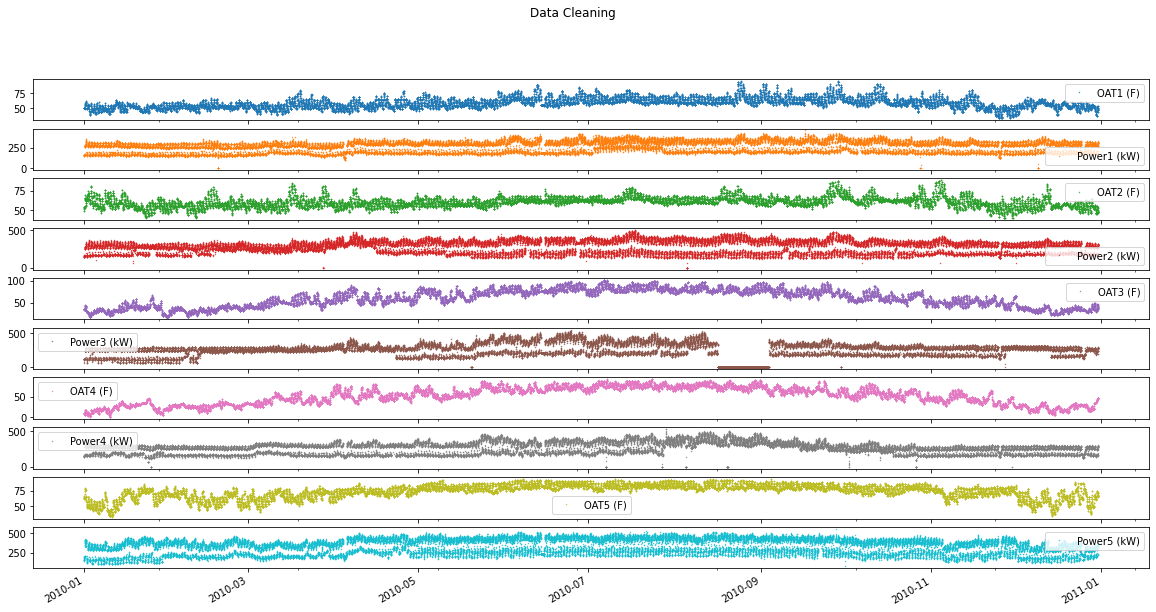

In [73]:
Data_Limpio.plot(figsize=(20,10),marker="o",ls="None",markersize=0.4,title="Data Cleaning",subplots=True)

Esta estrategia difiere de la que se usó en clase. Aunque ambas usan el cálculo del puntaje $z$, el $Criterio$ de $Chauvenet$ va un poco más allá; pues la estrategia de las 3 desviaciones estándar tan solo calcula el puntaje $z$ y verifica si es menor que 3 desviaciones estándar, si la respuesta a esa hipótesis es verdadera (osea que $z<3$) entonces se acepta el dato, sino se rechaza. Mientras que el Criterio de Chauvenet usa el puntaje $z$ para calcular la probabilidad de que el dato esté por fuera de $z$ veces la desviación estándar, luego el dato se acepta si la desigualdad es verdadera $n=N\cdot(1-P_{inside}[z\sigma_x])<0.5$

Se puede notar que apesar de que el Criterio se está aplicando correctamente a todos los datos, siguen apareciendo valores que esperábamos desaparecerían luego de aplicar la limpieza de datos, lo que nos da una tentativa de que el criterio no es muy eficaz. Aunque para uno de los datos de consumo de energía del edificio 3 que son 0 obtenemos: $n=324>0.5$, siendo esta la razón por la que no se descartan estos valores, pues 324 esta dentro del $1\sigma$ alrededor de la media $\bar{x}=255, \sigma=98$ lo cual aunque a simple vista parezca un dato atípico, en realidad no lo es.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff47042fe10>,
      dtype=object)

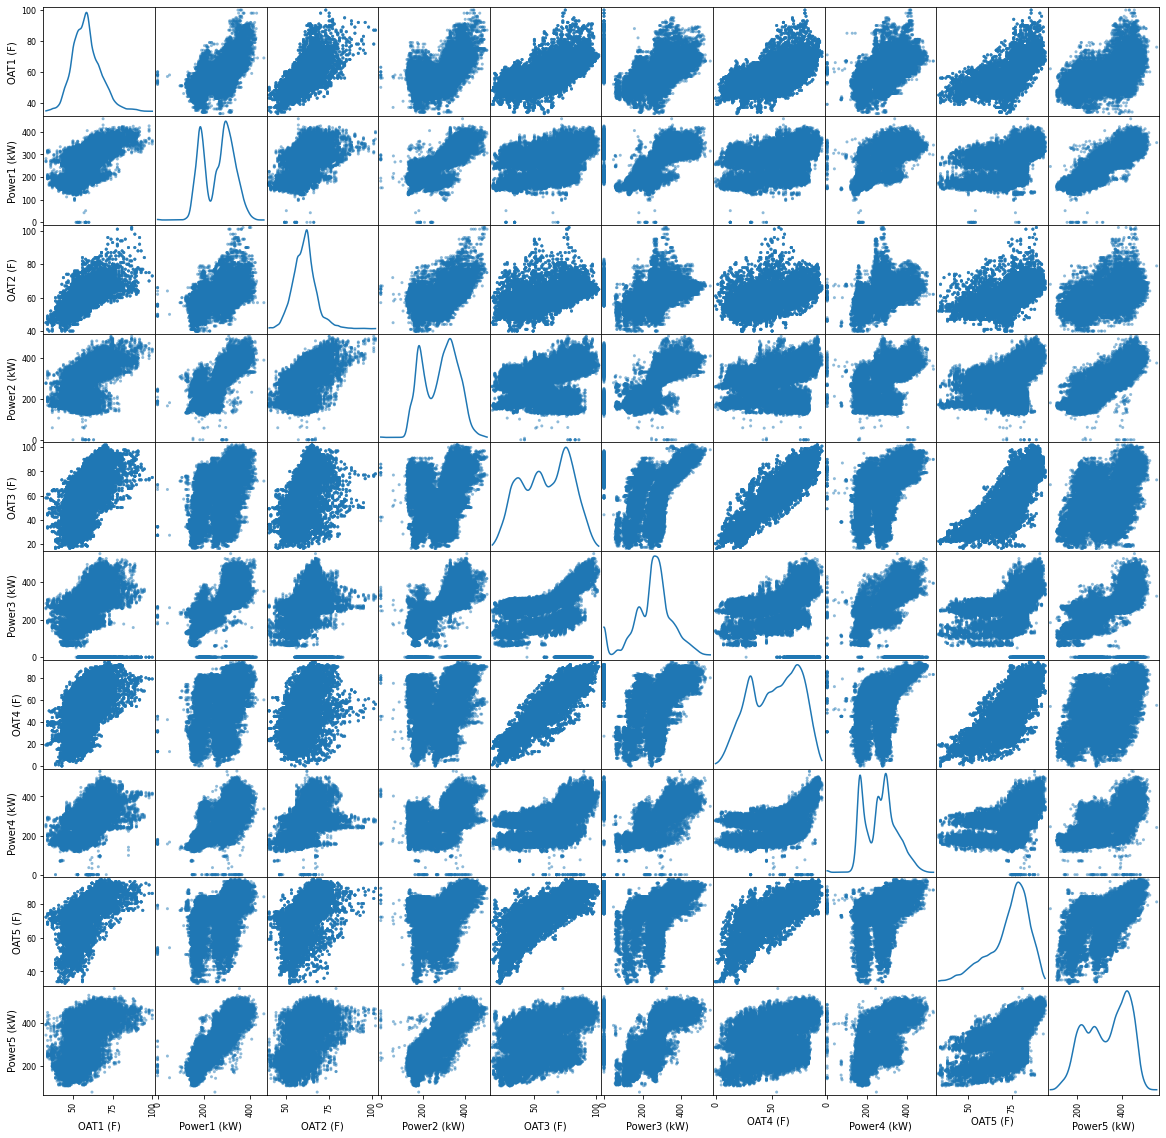

In [74]:
pd.plotting.scatter_matrix(data, alpha=0.5, figsize=(20, 20), diagonal="kde")

La gráfica "kde" perimite estimar la función densidad de probabilidad de una variable aleatoria a partir de un número finito de observaciones (muestra), pero estas gráficas no son de interés en este momento, sino que la importancia de esta gráfica es poder ver rápidamente la correlación entre todas las combinaciones de nuestros datos.


#1er Entrenamiento del modelo

En este punto me dí cuenta que la forma en que se organizó el DataFrame no sirve, debido a que no puedo tener una única variable a predecir sino que serían 5, una por cada edificio. Por esto reorganizamos el DataFrame concatenado por filas los datos de los edificios, para así poder tener una variable a predecir y un predictor que contienen todos los edificios.

Cabe resaltar que para crear este nuevo DataFrame se usará el DataFrame limpiado anteriormente.

In [75]:
Data_Limpio1=pd.DataFrame()
Data_Limpio1["OAT (F)"],Data_Limpio1["Power (kW)"]=Data_Limpio["OAT1 (F)"],Data_Limpio["Power1 (kW)"]  

Data_Limpio2=pd.DataFrame()
Data_Limpio2["OAT (F)"],Data_Limpio2["Power (kW)"]=Data_Limpio["OAT2 (F)"],Data_Limpio["Power3 (kW)"]  

Data_Limpio3=pd.DataFrame()
Data_Limpio3["OAT (F)"],Data_Limpio3["Power (kW)"]=Data_Limpio["OAT3 (F)"],Data_Limpio["Power3 (kW)"]  

Data_Limpio4=pd.DataFrame()
Data_Limpio4["OAT (F)"],Data_Limpio4["Power (kW)"]=Data_Limpio["OAT4 (F)"],Data_Limpio["Power4 (kW)"] 

Data_Limpio5=pd.DataFrame()
Data_Limpio5["OAT (F)"],Data_Limpio5["Power (kW)"]=Data_Limpio["OAT5 (F)"],Data_Limpio["Power5 (kW)"]  

a=[Data_Limpio1,Data_Limpio2,Data_Limpio3,Data_Limpio4,Data_Limpio5]
Data_Limpio_clean=pd.concat(a,axis=0)
Data_Limpio_clean

OAT (F)  Power (kW)
2010-01-01 01:15:00     51.0       165.1
2010-01-01 01:30:00     51.0       151.6
2010-01-01 01:45:00     51.0       146.9
2010-01-01 02:00:00     51.0       153.7
2010-01-01 02:15:00     51.0       153.8
...                      ...         ...
2010-12-30 23:00:00     67.0       333.7
2010-12-30 23:15:00     68.0       221.0
2010-12-30 23:30:00     68.0       235.7
2010-12-30 23:45:00     68.0       227.2
2010-12-31 00:00:00     68.0       234.5

[174280 rows x 2 columns]

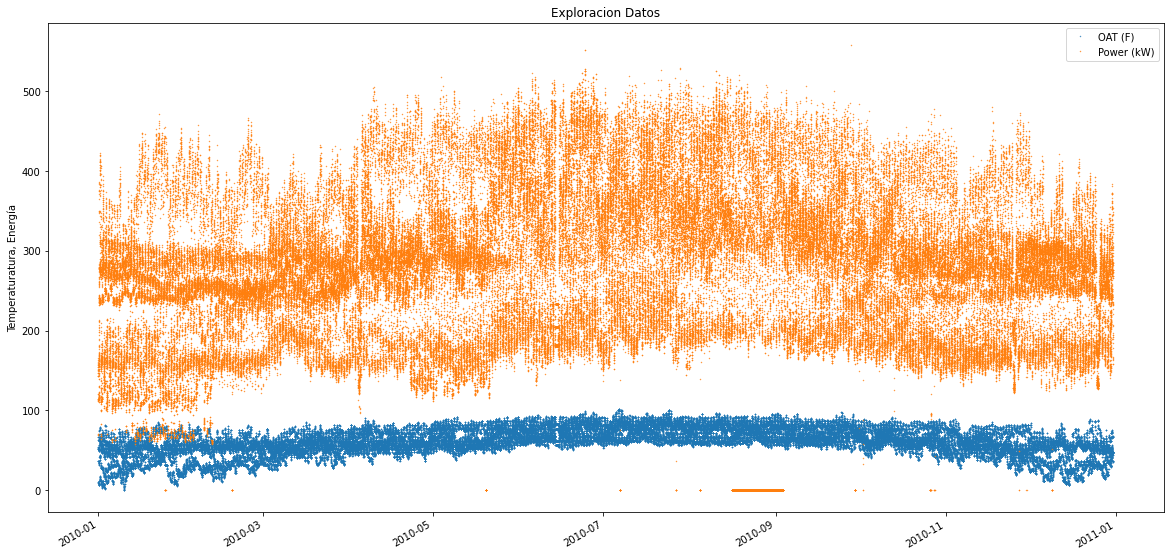

In [76]:
Data_Limpio_clean.plot(figsize=(20,10),marker="o",ls="None",markersize=0.4,ylabel="Temperaturatura, Energía",title="Exploracion Datos")

Se notan las dos franjas mencionadas anteriormente y en un tercer nivel muy poco visible, se pueden interpretar como el consumo en la mañana, tarde y noche

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff46dcd6cd0>,
      dtype=object)

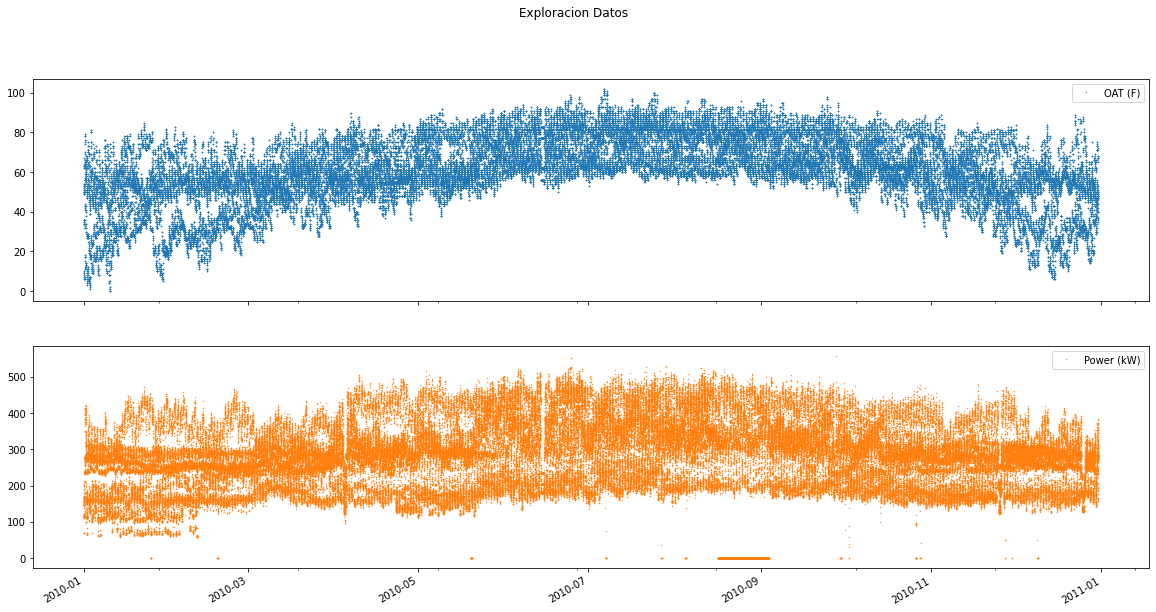

In [77]:
Data_Limpio_clean.plot(figsize=(20,10),marker="o",ls="None",markersize=0.4,title="Exploracion Datos",subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff46d422890>,
      dtype=object)

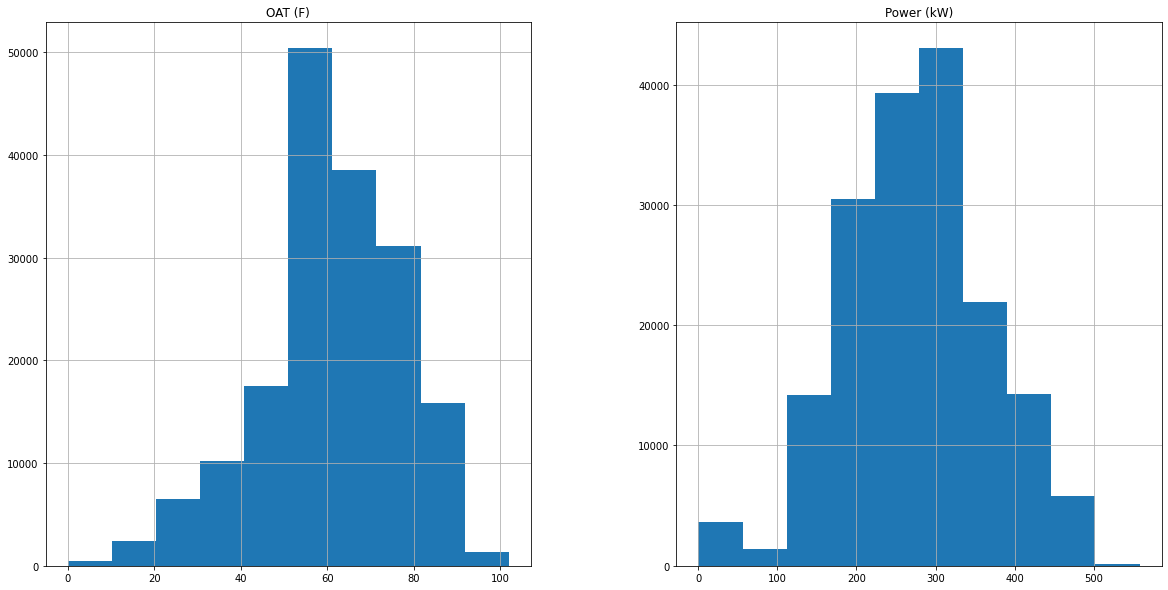

In [78]:
Data_Limpio_clean.hist(figsize=(20,10))

Es calro que ambos conjuntos de datos tienen tendencia normal.

In [79]:
#Convertimos el DataFrame en una matriz 
M=Data_Limpio_clean.values

def z(x,med,dev):
  return abs(x-med)/dev

def f(x):
  return 1/(np.sqrt(2*np.pi))*np.e**(-(x)**2/(2))

def Prob(x,med,dev):
  return quad(f,-z(x,med,dev),z(x,med,dev))[0]  #integramos por cuadraturas 

def n(x,med,dev,tam):
  return tam*(1-Prob(x,med,dev))

Ml_Chau=np.zeros((len(M[:,0]),len(M[0]))) 

for i in range(len(M[0])):
  N=M[:,i]
  med=np.mean(N)
  dev=np.std(N,ddof=1)
  tam=len(N)
  for j in range(len(M[:,0])):
    n_Chau=n(M[:,i][j],med,dev,tam)
    Ml_Chau[j][i]=n_Chau

Ml_Chau

array([[ 93810.75091624,  41978.11740006],
       [ 93810.75091624,  32694.32227794],
       [ 93810.75091624,  29847.08300873],
       ...,
       [116051.34593778, 118178.29694846],
       [116051.34593778, 106772.37039432],
       [116051.34593778, 116539.5429076 ]])

In [80]:
(Ml_Chau<0.5).any()

False

Por lo tanto no hay valores para limpiar según el Criterio de Chauvenet ya que no se cumple $n_{Chauvenet}<0.5$. 

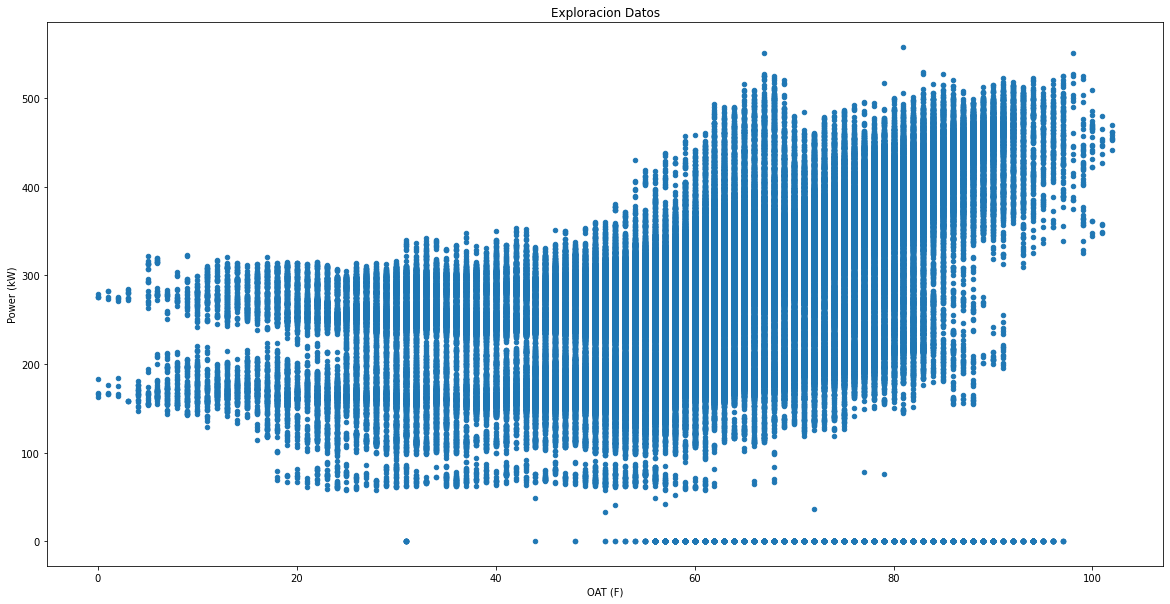

In [81]:
Data_Limpio_clean.plot(x="OAT (F)",y="Power (kW)",kind="scatter",figsize=(20,10),marker="o",ls="None",title="Exploracion Datos")

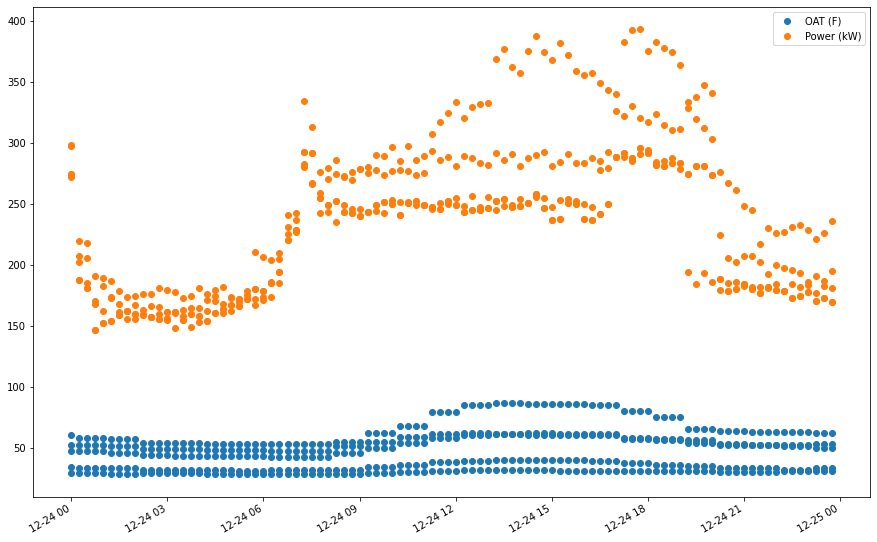

In [82]:
Data_Limpio_clean.loc["2010-12-24"].plot(figsize=(15,10),marker="o",ls="None")
#Data_Limpio_clean.loc["2010-04-18",['Power (kW)']].plot()


Podemos notar que el consumo de energía en general es mayor entre las 6am y 11pm, lo cual corresponde a cuando el edificio de retail (tienda) está abierto, y en los valores extremos el consumo de energía disminuye debido a que la tienda permanece cerrada, aún así consume energía por equipos de seguridad, neveras, televisores, etc. 

#1ra Regresión Lineal

In [83]:
X1=pd.DataFrame(Data_Limpio_clean["OAT (F)"])
y1=pd.DataFrame(Data_Limpio_clean["Power (kW)"])

linear_regression1 = LinearRegression()
LR1=linear_regression1.fit(X1,y1)

LR1_coef=linear_regression1.coef_

LR1_inter=linear_regression1.intercept_
LR1_coef,LR1_inter

(array([[2.70568707]]), array([109.3502281]))

obtuvimos $y=2.7X+109.3$

In [84]:
X11=X1.values.flatten()
y11=y1.values.flatten()
y11,X11

(array([165.1, 151.6, 146.9, ..., 235.7, 227.2, 234.5]),
 array([51., 51., 51., ..., 68., 68., 68.]))

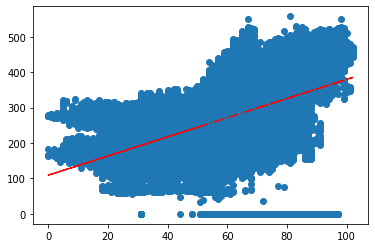

In [85]:
y_pred1 = LR1_inter[0] + LR1_coef[0][0] * X11

# dibujar los datos
plt.plot(X11,y11,'o')
# dibujar recta estimada
plt.plot(X11, y_pred1, '-.r')

Puntaje de la regresión lineal con todos los datos. Bastante bajo el score.

In [86]:
linear_regression1.score(X1,y1)

0.22224582135779836

Ahora vamos a dividir nuestro dataset en uno que sea de test y otro de entrenamiento, porque al entrenar el modelo de regresión lineal se esta optimizando la regresión para los datos dentro de nuestro dataset de entrenamiento, y nuestro dataset de test servirá para probar ese modela y verificar que al aparecer un dato nuevo pueda darle un valor correcto en base al modelo entrenado.

usaremos un tamaño de datos de Test del 33% y un tamaño de datos de entrenamiento del 67%

In [87]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=20)

In [88]:
linear_regression2=LinearRegression()
LR2=linear_regression2.fit(X_train1,y_train1)

LR2_coef=linear_regression2.coef_

LR2_inter=linear_regression2.intercept_
LR2_coef,LR2_inter

(array([[2.72283497]]), array([108.52280843]))

In [89]:
X22=X_test1.values.flatten()
y22=y_test1.values.flatten()
y22,X22

(array([295.9, 207.3, 379.2, ..., 264.2, 263. , 175.7]),
 array([56., 55., 79., ..., 59., 43., 56.]))

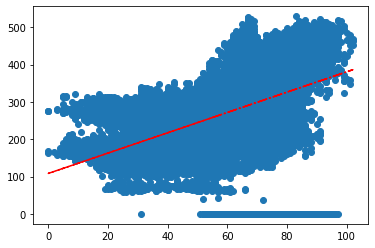

In [90]:
y_pred2 = LR2_inter[0] + LR2_coef[0][0] * X22

# dibujar los datos
plt.plot(X22,y22,'o')
# dibujar recta estimada
plt.plot(X22, y_pred2, '-.r')

In [91]:
linear_regression2.score(X_test1,y_test1)

0.21617927287401972

El puntaje no varía mucho una vez fue entrenado el modelo. Además notamos que la línea sí tiene la tendencia de los datos.

# Aumento de los predictores

In [92]:
Data_Limpio_clean2=Data_Limpio_clean
Data_Limpio_clean2["hour"]=Data_Limpio_clean2.index.hour
Data_Limpio_clean2

OAT (F)  Power (kW)  hour
2010-01-01 01:15:00     51.0       165.1     1
2010-01-01 01:30:00     51.0       151.6     1
2010-01-01 01:45:00     51.0       146.9     1
2010-01-01 02:00:00     51.0       153.7     2
2010-01-01 02:15:00     51.0       153.8     2
...                      ...         ...   ...
2010-12-30 23:00:00     67.0       333.7    23
2010-12-30 23:15:00     68.0       221.0    23
2010-12-30 23:30:00     68.0       235.7    23
2010-12-30 23:45:00     68.0       227.2    23
2010-12-31 00:00:00     68.0       234.5     0

[174280 rows x 3 columns]

In [93]:
X = pd.DataFrame(Data_Limpio_clean2[['OAT (F)','hour']])
y = pd.DataFrame(Data_Limpio_clean2['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.39852818465847784

Al aumentar los predictores usando la hora, se mejora en 2 veces el puntaje de la regresión lineal, por tanto la hora tiene una muy buena correlación con el consumo de energía.

Ahora vamos a crear una característica cualitativa relacionada con el estado de las tiendas: abierto o cerrado.

Vamos a sumir que si la tienda está abierta la nueva característica tendrá un valor de 1, de lo contrario será 0

¿Cuál es el horario de apertura de la tienda? 6h a 21h como vimos anteriormente.

In [94]:
Data_Limpio_clean2['work_hour'] = np.where((Data_Limpio_clean2.index.hour >= 6) & (Data_Limpio_clean2.index.hour <= 22),1,0)
Data_Limpio_clean2

OAT (F)  Power (kW)  hour  work_hour
2010-01-01 01:15:00     51.0       165.1     1          0
2010-01-01 01:30:00     51.0       151.6     1          0
2010-01-01 01:45:00     51.0       146.9     1          0
2010-01-01 02:00:00     51.0       153.7     2          0
2010-01-01 02:15:00     51.0       153.8     2          0
...                      ...         ...   ...        ...
2010-12-30 23:00:00     67.0       333.7    23          0
2010-12-30 23:15:00     68.0       221.0    23          0
2010-12-30 23:30:00     68.0       235.7    23          0
2010-12-30 23:45:00     68.0       227.2    23          0
2010-12-31 00:00:00     68.0       234.5     0          0

[174280 rows x 4 columns]

Comprobemos el puntaje de la regresión con este nuevo predictor.

In [95]:
X = pd.DataFrame(Data_Limpio_clean2[['OAT (F)','hour',"work_hour"]])
y = pd.DataFrame(Data_Limpio_clean2['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.46292386939776053

Mejoro nuestro puntaje de la regresión.

De los Gráficos notamos que hay mayor consumo de energía entre los meses 5 y 10, debido al uso prolongado de aires acondicionados, ventiladores, etc.

Introducimos un predictor que le ponga un peso de 1 a estos valores.

In [96]:
Data_Limpio_clean2['summer_month'] = np.where((Data_Limpio_clean2.index.month >= 5) & (Data_Limpio_clean2.index.month <= 10),1,0)
Data_Limpio_clean2

OAT (F)  Power (kW)  hour  work_hour  summer_month
2010-01-01 01:15:00     51.0       165.1     1          0             0
2010-01-01 01:30:00     51.0       151.6     1          0             0
2010-01-01 01:45:00     51.0       146.9     1          0             0
2010-01-01 02:00:00     51.0       153.7     2          0             0
2010-01-01 02:15:00     51.0       153.8     2          0             0
...                      ...         ...   ...        ...           ...
2010-12-30 23:00:00     67.0       333.7    23          0             0
2010-12-30 23:15:00     68.0       221.0    23          0             0
2010-12-30 23:30:00     68.0       235.7    23          0             0
2010-12-30 23:45:00     68.0       227.2    23          0             0
2010-12-31 00:00:00     68.0       234.5     0          0             0

[174280 rows x 5 columns]

In [97]:
X = pd.DataFrame(Data_Limpio_clean2[['OAT (F)','hour',"work_hour","summer_month"]])
y = pd.DataFrame(Data_Limpio_clean2['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.4632741919942206

Introducimos otro predictor que le ponga un peso de 1 a los valores que esten entre las 12 y 18, ya que es donde hay más afluencia de personas y por tanto un mayor consumo de energía.

In [98]:
Data_Limpio_clean2['rush_hour'] = np.where((Data_Limpio_clean2.index.hour >= 12) & (Data_Limpio_clean2.index.hour <= 18),1,0)
Data_Limpio_clean2

OAT (F)  Power (kW)  ...  summer_month  rush_hour
2010-01-01 01:15:00     51.0       165.1  ...             0          0
2010-01-01 01:30:00     51.0       151.6  ...             0          0
2010-01-01 01:45:00     51.0       146.9  ...             0          0
2010-01-01 02:00:00     51.0       153.7  ...             0          0
2010-01-01 02:15:00     51.0       153.8  ...             0          0
...                      ...         ...  ...           ...        ...
2010-12-30 23:00:00     67.0       333.7  ...             0          0
2010-12-30 23:15:00     68.0       221.0  ...             0          0
2010-12-30 23:30:00     68.0       235.7  ...             0          0
2010-12-30 23:45:00     68.0       227.2  ...             0          0
2010-12-31 00:00:00     68.0       234.5  ...             0          0

[174280 rows x 6 columns]

In [99]:
X = pd.DataFrame(Data_Limpio_clean2[['OAT (F)','hour',"work_hour","summer_month","rush_hour"]])
y = pd.DataFrame(Data_Limpio_clean2['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.4680017835558389

Introducimos otro predictor que le ponga un peso de 1 a los valores de hora que esten entre las 17 y las 22, debido a que esta hora se prenden todas las luces internas y de la fachada o partes externas del edificio.

In [100]:
Data_Limpio_clean2['light_hour'] = np.where((Data_Limpio_clean2.index.hour >= 17) & (Data_Limpio_clean2.index.hour <= 22),1,0)
Data_Limpio_clean2

OAT (F)  Power (kW)  ...  rush_hour  light_hour
2010-01-01 01:15:00     51.0       165.1  ...          0           0
2010-01-01 01:30:00     51.0       151.6  ...          0           0
2010-01-01 01:45:00     51.0       146.9  ...          0           0
2010-01-01 02:00:00     51.0       153.7  ...          0           0
2010-01-01 02:15:00     51.0       153.8  ...          0           0
...                      ...         ...  ...        ...         ...
2010-12-30 23:00:00     67.0       333.7  ...          0           0
2010-12-30 23:15:00     68.0       221.0  ...          0           0
2010-12-30 23:30:00     68.0       235.7  ...          0           0
2010-12-30 23:45:00     68.0       227.2  ...          0           0
2010-12-31 00:00:00     68.0       234.5  ...          0           0

[174280 rows x 7 columns]

In [101]:
X = pd.DataFrame(Data_Limpio_clean2[['OAT (F)','hour',"work_hour","summer_month","rush_hour","light_hour"]])
y = pd.DataFrame(Data_Limpio_clean2['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.47009294316455474

Introducimos otro predictor que le ponga un peso de 1 a los valores que tengan los meses 7 y 8 ya que son en los que la temperatura es máxima y se usa mucha más energía que la usada en verano, son los picos de temperatura del verano.

In [102]:
Data_Limpio_clean2['max_mounth'] = np.where((Data_Limpio_clean2.index.month >= 7) & (Data_Limpio_clean2.index.month <= 8),1,0)
Data_Limpio_clean2

OAT (F)  Power (kW)  ...  light_hour  max_mounth
2010-01-01 01:15:00     51.0       165.1  ...           0           0
2010-01-01 01:30:00     51.0       151.6  ...           0           0
2010-01-01 01:45:00     51.0       146.9  ...           0           0
2010-01-01 02:00:00     51.0       153.7  ...           0           0
2010-01-01 02:15:00     51.0       153.8  ...           0           0
...                      ...         ...  ...         ...         ...
2010-12-30 23:00:00     67.0       333.7  ...           0           0
2010-12-30 23:15:00     68.0       221.0  ...           0           0
2010-12-30 23:30:00     68.0       235.7  ...           0           0
2010-12-30 23:45:00     68.0       227.2  ...           0           0
2010-12-31 00:00:00     68.0       234.5  ...           0           0

[174280 rows x 8 columns]

In [103]:
X = pd.DataFrame(Data_Limpio_clean2[['OAT (F)','hour',"work_hour","summer_month","rush_hour","rush_hour",'max_mounth']])
y = pd.DataFrame(Data_Limpio_clean2['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.4690352342713172

Introducimos otro predictor que le ponga un peso de 1 a los valores que tengan la temperatura entre 75 y 120 F, debido a que por las altas temperaturas tambíen habrá un mayor consumo de energía.

In [104]:
Data_Limpio_clean2['by_temp'] = np.where((Data_Limpio_clean2["OAT (F)"]>=75)& (Data_Limpio_clean2["OAT (F)"]<=120),1,0)
Data_Limpio_clean2

OAT (F)  Power (kW)  hour  ...  light_hour  max_mounth  by_temp
2010-01-01 01:15:00     51.0       165.1     1  ...           0           0        0
2010-01-01 01:30:00     51.0       151.6     1  ...           0           0        0
2010-01-01 01:45:00     51.0       146.9     1  ...           0           0        0
2010-01-01 02:00:00     51.0       153.7     2  ...           0           0        0
2010-01-01 02:15:00     51.0       153.8     2  ...           0           0        0
...                      ...         ...   ...  ...         ...         ...      ...
2010-12-30 23:00:00     67.0       333.7    23  ...           0           0        0
2010-12-30 23:15:00     68.0       221.0    23  ...           0           0        0
2010-12-30 23:30:00     68.0       235.7    23  ...           0           0        0
2010-12-30 23:45:00     68.0       227.2    23  ...           0           0        0
2010-12-31 00:00:00     68.0       234.5     0  ...           0           0        0

[174280 rows x 9 columns]

In [105]:
X = pd.DataFrame(Data_Limpio_clean2[['OAT (F)','hour',"work_hour","summer_month","rush_hour","light_hour",'max_mounth','by_temp']])
y = pd.DataFrame(Data_Limpio_clean2['Power (kW)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.score(X_test,y_test)

0.48994680302497723

##Conclusión

El puntaje de este modelo comparado con el modelo incial sin aumentar los datos es mayor, pues el primer modelo entrenado tuvo un $R^2=0.2162$, mientras que para el modelo final con los datos aumentados el ajuste fue $R^2=0.4899$, esto nos permite ver la potencia del metodo de ingeniería.

El $R^2$ del modelo final no es para nada aceptable a la hora de usarlo para predecir resultados futuros respecto al consumo de energía de un edificio de retail, la limpieza de los datos quizás fue el talón de aquiles y con un método más elaborado seguro que se pueden obtener mejores resultados. 

El punto a mejorar en mi opinion es aprender más métodos de limpieza de datos, donde se eliminen datos iguales o se aprenda a testear cuando una limpieza esta buena o no. En general aprender a limpiar datos de manera correcta.